<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Activity'n'climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

In [117]:
path ='/content/drive/MyDrive/Colab Notebooks/Data for JER/Temp_time_series2014-2016.csv'
df = pd.read_csv(path,parse_dates=['Date'])
df.dropna(inplace=True)
df.tail(30)

,Date,Conc,Temp
327,2016-11-28,35,-1.0
328,2016-11-29,51,-7.0
329,2016-11-30,64,-7.4
330,2016-12-01,12,-1.3
331,2016-12-02,10,-1.8
332,2016-12-03,18,-4.4
333,2016-12-04,14,-6.7
334,2016-12-05,11,-3.6
335,2016-12-06,10,-0.2
336,2016-12-07,18,-10.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 360
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    357 non-null    datetime64[ns]
 1   Conc    357 non-null    int64         
 2   Temp    357 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.2 KB


In [107]:
np.isinf(df['Conc']).any()
np.isnan(df['Conc']).any()

False

In [118]:
np.isfinite(df['Temp']).all()

True

In [122]:
#df.replace(-np.inf, np.nan)
with pd.option_context('mode.use_inf_as_null', True):
   df = df.dropna()
df   

,Date,Conc,Temp
0,2014-01-01,16,-3.5
1,2014-01-02,15,-0.9
2,2014-01-03,22,0.5
3,2014-01-04,15,0.6
4,2014-01-05,22,0.6
...,...,...,...
355,2016-12-26,5,1.0
357,2016-12-28,5,-2.0
358,2016-12-29,13,-3.3
359,2016-12-30,10,-3.1


In [120]:
df[df['Temp'] == 'NaN']

,Date,Conc,Temp


In [121]:
np.isfinite(df['Temp']).all()

True

In [83]:
np.isnan(df['Temp']).any()

False

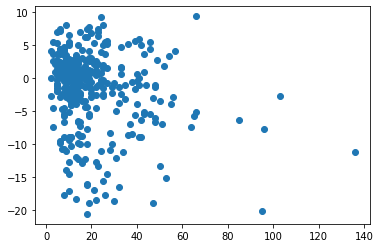

In [137]:
x = df['Conc']
y = df['Temp']
plt.scatter(x,y)

In [138]:
corr = x.corr(y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.194


In [141]:
path1 = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Temp_time_series2014-2016_1.csv'
df1 = pd.read_csv(path1, parse_dates=['Date'])
df1
ox = df1['Conc']
oy = df1['Temp']

In [142]:
corr = ox.corr(oy)
print('Correlation: %.3f' % corr)

Correlation: -0.360


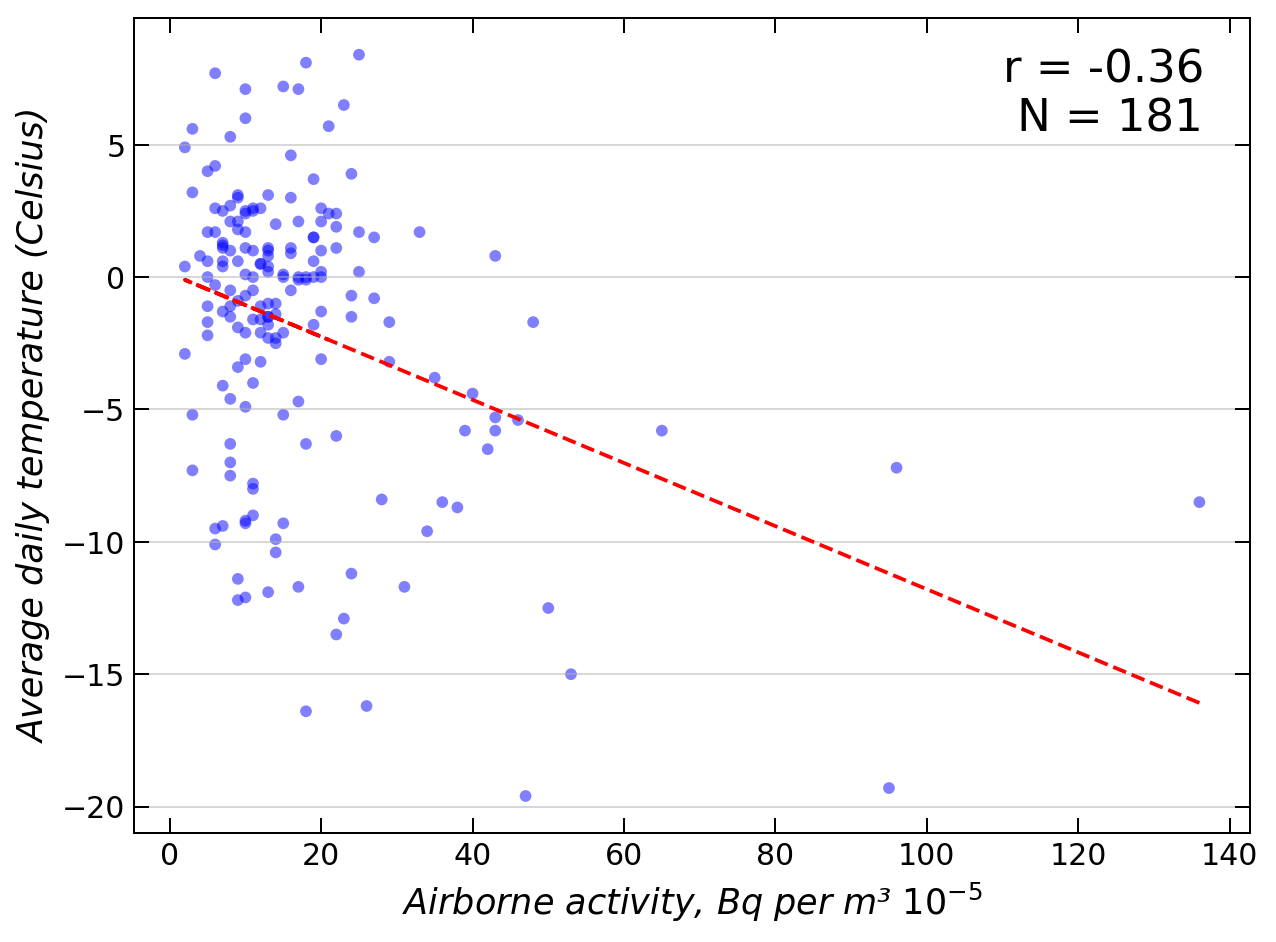

In [186]:
s = chr(0x00b3)
s1 = ' $10^{-5}$'

fig, ax = plt.subplots(figsize = (8, 6), dpi =180)

plt.scatter(ox, oy, marker = 'o',
            facecolor = 'blue',
            edgecolors='None',
            alpha=0.5,
            s= 22)
z = np.polyfit(ox, oy, 1)
p = np.poly1d(z)
ax.tick_params(axis='both', 
               direction='in',
               labelsize = 12,
               length = 6,
               top = True,
               right = True)
ax.set_xlabel('Airborne activity, Bq per m'+s + s1,
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax.set_ylabel('Average daily temperature (Celsius)',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
plt.grid(axis = 'y', alpha =0.5)
ax.plot(ox, p(ox),'r--')
plt.text(110, 5.5, 'r = %.2f \n N = 181' % corr, fontsize = 18, ha="left")
plt.show()

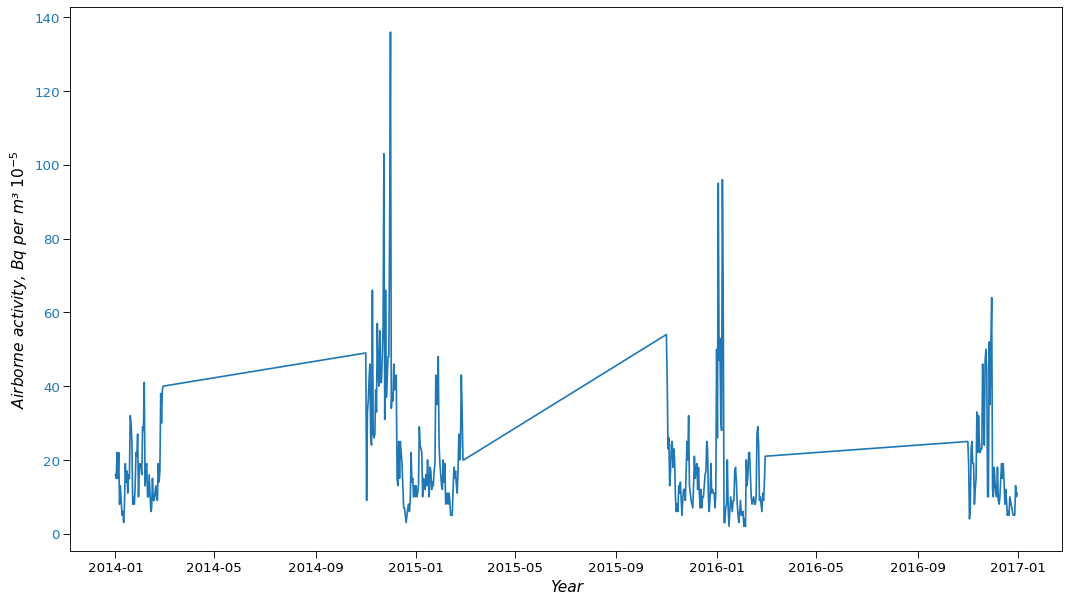

In [187]:
x1 = df['Date']
y1 = df['Temp']
y2 = df['Conc']

fig, ax1 = plt.subplots(1,1, figsize = (16, 9), dpi = 80)
ax1.plot(x1, y2, color = 'tab:blue')

ax1.set_xlabel('Year',
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax1.tick_params(axis='x', 
               direction='out',
               labelsize = 12,
               length = 6)
ax1.set_ylabel('Airborne activity, Bq per m'+s + s1,
               fontsize = 14,
               fontstyle='oblique',
               fontweight = 'medium')
ax1.tick_params(axis='y', 
               direction='out',
               labelsize = 12,
               length = 6,
                labelcolor='tab:blue' )
plt.show()